In [1]:
import pandas as pd
from pandas import DataFrame
import random as rm
import numpy as np
import time
import networkx as nx
import pickle
import datetime
from datetime import timedelta
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

In [2]:
filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001Df.pickle"
pickle_in=open(filename,"rb")
Df=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002Df.pickle"
#pickle_in=open(filename,"rb")
#Df1=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191003Df.pickle"
#pickle_in=open(filename,"rb")
#Df2=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191004Df.pickle"
#pickle_in=open(filename,"rb")
#Df3=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191005Df.pickle"
#pickle_in=open(filename,"rb")
#Df4=pickle.load(pickle_in)
#Df=Df.append(Df1)
#Df=Df.append(Df2)
#Df=Df.append(Df3)
#Df=Df.append(Df4)
Df

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,0344,0342,2D01,THOPBAY,-41,2019-10-01 04:06:00,0 days 00:00:04,2019-10-01 04:06:45,2019-10-01 04:06:04
1,UR,0342,0340,2D01,UR,0,2019-10-01 04:07:16,0 days 00:00:00,2019-10-01 04:07:16,2019-10-01 04:07:16
2,UR,0340,0338,2D01,STHNDE,35,2019-10-01 04:08:00,0 days 00:00:29,2019-10-01 04:07:54,2019-10-01 04:08:29
3,UR,0338,0336,2D01,STHNDE,-30,2019-10-01 04:08:00,0 days 00:00:50,2019-10-01 04:09:20,2019-10-01 04:08:50
4,UR,0336,0334,2D01,UR,0,2019-10-01 04:09:50,0 days 00:00:00,2019-10-01 04:09:50,2019-10-01 04:09:50
...,...,...,...,...,...,...,...,...,...,...
28934,UR,0343,0345,1D93,THOPBAY,33,2019-10-01 01:47:00,0 days 23:58:22,2019-10-02 01:44:49,2019-10-02 01:45:22
28935,UR,0345,0349,1D93,THOPBAY,-32,2019-10-01 01:47:00,0 days 23:58:45,2019-10-02 01:46:17,2019-10-02 01:45:45
28936,UR,0349,0351,1D93,UR,0,2019-10-02 01:46:49,0 days 00:00:00,2019-10-02 01:46:49,2019-10-02 01:46:49
28937,UR,0351,0353,1D93,UR,0,2019-10-02 01:47:08,0 days 00:00:00,2019-10-02 01:47:08,2019-10-02 01:47:08


In [3]:
Df.iloc[280:320]

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
280,UR,0140,0138,2R51,UR,0,2019-10-01 05:17:48,0 days 00:00:00,2019-10-01 05:17:48,2019-10-01 05:17:48
281,UR,0138,0136,2R51,WHAMHL,0,2019-10-01 05:18:00,0 days 00:00:04,2019-10-01 05:18:04,2019-10-01 05:18:04
282,UR,0136,0134,2R51,WHAMHL,0,2019-10-01 05:18:00,0 days 00:01:28,2019-10-01 05:19:28,2019-10-01 05:19:28
283,UR,0134,0132,2R51,UR,0,2019-10-01 05:19:55,0 days 00:00:00,2019-10-01 05:19:55,2019-10-01 05:19:55
284,UR,0132,0130,2R51,UR,0,2019-10-01 05:20:24,0 days 00:00:00,2019-10-01 05:20:24,2019-10-01 05:20:24
285,UR,0130,0128,2R51,UR,0,2019-10-01 05:21:10,0 days 00:00:00,2019-10-01 05:21:10,2019-10-01 05:21:10
286,UR,0128,0126,2R51,UR,0,2019-10-01 05:22:01,0 days 00:00:00,2019-10-01 05:22:01,2019-10-01 05:22:01
287,UR,0126,0124,2R51,UR,0,2019-10-01 05:22:27,0 days 00:00:00,2019-10-01 05:22:27,2019-10-01 05:22:27
288,UR,0124,0122,2R51,LIMHSE,33,2019-10-01 05:23:00,0 days 00:00:15,2019-10-01 05:22:42,2019-10-01 05:23:15
289,UR,0122,0120,2R51,LIMHSE,-31,2019-10-01 05:23:00,0 days 00:00:47,2019-10-01 05:24:18,2019-10-01 05:23:47


In [4]:
Train=Df[Df['Headcode']=='2D01'].reset_index(drop=True)
Train2=Df[Df['Headcode']=='2B51'].reset_index(drop=True)
#Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
Train2.iloc[60:]

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
60,UR,0210,0206,2B51,UR,0,2019-10-01 04:57:27,0 days 00:00:00,2019-10-01 04:57:27,2019-10-01 04:57:27
61,UR,0206,0204,2B51,UR,0,2019-10-01 04:57:50,0 days 00:00:00,2019-10-01 04:57:50,2019-10-01 04:57:50
62,UR,0204,0202,2B51,UR,0,2019-10-01 04:58:10,0 days 00:00:00,2019-10-01 04:58:10,2019-10-01 04:58:10
63,UR,0202,0198,2B51,UR,0,2019-10-01 04:58:32,0 days 00:00:00,2019-10-01 04:58:32,2019-10-01 04:58:32
64,UR,0198,0196,2B51,UR,0,2019-10-01 04:58:55,0 days 00:00:00,2019-10-01 04:58:55,2019-10-01 04:58:55
65,UR,0196,0194,2B51,UR,0,2019-10-01 04:59:25,0 days 00:00:00,2019-10-01 04:59:25,2019-10-01 04:59:25
66,UR,0194,0192,2B51,UR,0,2019-10-01 04:59:48,0 days 00:00:00,2019-10-01 04:59:48,2019-10-01 04:59:48
67,UR,0192,0190,2B51,UR,0,2019-10-01 05:00:23,0 days 00:00:00,2019-10-01 05:00:23,2019-10-01 05:00:23
68,UR,0190,0188,2B51,UR,0,2019-10-01 05:00:52,0 days 00:00:00,2019-10-01 05:00:52,2019-10-01 05:00:52
69,UR,0188,0182,2B51,UR,0,2019-10-01 05:01:21,0 days 00:00:00,2019-10-01 05:01:21,2019-10-01 05:01:21


In [5]:
Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
TIPLOCs=Train['TIPLOC'].unique()
TIPLOCs

array(['THOPBAY', 'STHNDE', 'STHCENT', 'WCLIFF', 'LHONSEA', 'BENFLET',
       'PITSEA', 'OCKENDN', 'UPMNSTR', 'BARKING', 'WHAMHL', 'LIMHSE',
       'FENCHRS'], dtype=object)

In [6]:
Train

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,0344,0342,2D01,THOPBAY,-41,2019-10-01 04:06:00,0 days 00:00:04,2019-10-01 04:06:45,2019-10-01 04:06:04
1,UR,0340,0338,2D01,STHNDE,35,2019-10-01 04:08:00,0 days 00:00:29,2019-10-01 04:07:54,2019-10-01 04:08:29
2,UR,0338,0336,2D01,STHNDE,-30,2019-10-01 04:08:00,0 days 00:00:50,2019-10-01 04:09:20,2019-10-01 04:08:50
3,UR,0334,0330,2D01,STHCENT,43,2019-10-01 04:11:00,-1 days +23:59:50,2019-10-01 04:10:07,2019-10-01 04:10:50
4,UR,0330,0326,2D01,STHCENT,-25,2019-10-01 04:11:00,0 days 00:00:11,2019-10-01 04:11:36,2019-10-01 04:11:11
5,UR,0324,0320,2D01,WCLIFF,17,2019-10-01 04:14:00,-1 days +23:58:58,2019-10-01 04:12:41,2019-10-01 04:12:58
6,UR,0320,0318,2D01,WCLIFF,-38,2019-10-01 04:14:00,-1 days +23:59:46,2019-10-01 04:14:24,2019-10-01 04:13:46
7,UR,0306,0304,2D01,LHONSEA,42,2019-10-01 04:19:00,-1 days +23:59:35,2019-10-01 04:17:53,2019-10-01 04:18:35
8,UR,0304,0302,2D01,LHONSEA,-21,2019-10-01 04:19:00,0 days 00:00:03,2019-10-01 04:19:24,2019-10-01 04:19:03
9,UR,0288,0286,2D01,BENFLET,43,2019-10-01 04:23:00,0 days 00:00:03,2019-10-01 04:22:20,2019-10-01 04:23:03


In [7]:
def Train_timings(Df,Headcode):
    Train=Df[Df['Headcode']==Headcode].reset_index(drop=True)
    Train=Train[Train['TIPLOC']!='UR'].reset_index(drop=True)
    TIPLOCs=Train['TIPLOC'].unique()
    Time=[]
    for i in range(0,len(TIPLOCs)):
        for j in range(0,len(Train)):
            if Train['TIPLOC'][j]==TIPLOCs[i]:
                #Time=Time+[str(Train['AdjUTC'][j])]
                Time=Time+[Train['AdjUTC'][j]]
                break
    Graphdata=pd.DataFrame()
    Graphdata['TIPLOC']=TIPLOCs
    Graphdata['Time']=Time
    Graphdata=Graphdata[Graphdata['TIPLOC']!='OCKENDN']
    Graphdata=Graphdata.set_index('TIPLOC')
    Graphdata[Headcode]=Graphdata['Time']
    del Graphdata['Time']
    return Graphdata

In [98]:
Uniqueheadcodes=Df['Headcode'].unique()
Uniqueheadcodes

array(['2D01', '2B51', '2D03', '2R51', '2D00', '2B53', '2B50', '2D02',
       '2D05', '2B55', '2R50', '2R53', '2R54', '2B57', '2B52', '2R59',
       '1B01', '2D04', '1F59', '2R55', '2R57', '2R61', '1F61', '2R56',
       '2R52', '2B54', '1B03', '2J94', '2D06', '1F63', '2D11', '2D07',
       '2J98', '1B00', '1B23', '2R58', '1D09', '2J00', '2B56', '1B05',
       '2D08', '1F67', '1B07', '2R60', '1B04', '2R67', '2R65', '1B09',
       '1B06', '2R63', '2J01', '1N94', '2B58', '2D13', '1P13', '2R62',
       '2J04', '2R69', '2N03', '2J03', '2D10', '1B11', '1B26', '1B81',
       '2R64', '2D15', '1B17', '2J06', '1B10', '2J05', '1B15', '1N12',
       '1B14', '2D17', '1B21', '1P73', '2R66', '2N05', '2J08', '2B60',
       '2J07', '2R71', '2D12', '1B19', '1B39', '1R74', '1B25', '2D19',
       '2R75', '1B18', '2J10', '2R68', '2J09', '1N62', '2R73', '1F62',
       '1B29', '2F22', '2D21', '2R70', '2J12', '1F64', '1B27', '2N07',
       '2J11', '1P24', '1D14', '1F79', '2R72', '2D23', '1B24', '2J14',
      

In [13]:
def null_ranges(Times):
    a=pd.isnull(Times)
    b=[]
    for i in range (0,len(a)):
        if a[i]==False:
            b.append(i)
    b = sorted(set(b))
    gaps = [[s, e] for s, e in zip(b, b[1:]) if s+1 < e]
    edges = iter(b[:1] + sum(gaps, []) + b[-1:])
    return list(zip(edges, edges))

In [101]:
null_ranges(Train_timings(Df,Headcodes[0]))

KeyError: 0

In [70]:
Train_timings(Df,'2R51')

,2R51
TIPLOC,
BARKING,2019-10-01 05:12:35
WHAMHL,2019-10-01 05:18:04
LIMHSE,2019-10-01 05:23:15
FENCHRS,2019-10-01 05:28:22


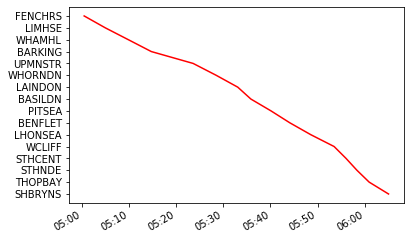

In [59]:
graphchunks=null_ranges(Graphdatacombo['2B50'])
if len(graphchunks)==1:
    plt.plot(Graphdatacombo[Headcodes[1]],Graphdatacombo['TIPLOC'],'r')
else:
    a=0
    for i in range(0,len(graphchunks)):
        plt.plot(Graphdatacombo[Headcodes[1]].iloc[graphchunks[i][0]:graphchunks[i][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[i][0]:graphchunks[i][1]+1],'g')
    for k in range(0,len(graphchunks)-1):
        plt.plot(Graphdatacombo[Headcodes[1]].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo[Headcodes[1]].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),Graphdatacombo['TIPLOC'].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo['TIPLOC'].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),'g--')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

In [102]:
null_ranges(Graphdatacombo['2D01'])

[(1, 7), (11, 15)]

,TIPLOC,2B51,2B50,2D01,2R51,2D00,2D03,2B53,2D02,2D05,2B55
0,SHBRYNS,2019-10-01 04:15:00,2019-10-01 06:05:05,NaT,NaT,NaT,NaT,2019-10-01 04:59:17,NaT,NaT,2019-10-01 05:13:17
1,THOPBAY,2019-10-01 04:18:28,2019-10-01 06:00:58,2019-10-01 04:06:04,NaT,NaT,2019-10-01 04:35:06,2019-10-01 05:02:39,NaT,2019-10-01 05:09:05,2019-10-01 05:16:19
2,STHNDE,2019-10-01 04:21:13,2019-10-01 05:58:22,2019-10-01 04:08:29,NaT,NaT,2019-10-01 04:37:26,2019-10-01 05:05:19,NaT,2019-10-01 05:11:18,2019-10-01 05:19:15
3,STHCENT,2019-10-01 04:23:42,2019-10-01 05:56:03,2019-10-01 04:10:50,NaT,2019-10-01 05:52:48,2019-10-01 04:39:42,2019-10-01 05:07:57,2019-10-01 06:19:50,2019-10-01 05:13:37,2019-10-01 05:21:34
4,WCLIFF,2019-10-01 04:25:57,2019-10-01 05:53:31,2019-10-01 04:12:58,NaT,2019-10-01 05:49:42,2019-10-01 04:41:58,2019-10-01 05:10:07,2019-10-01 06:17:01,2019-10-01 05:15:41,2019-10-01 05:24:10
5,LHONSEA,2019-10-01 04:31:05,2019-10-01 05:48:33,2019-10-01 04:18:35,NaT,2019-10-01 05:44:50,2019-10-01 04:47:07,2019-10-01 05:15:16,2019-10-01 06:12:13,2019-10-01 05:20:27,2019-10-01 05:29:17
6,BENFLET,2019-10-01 04:35:24,2019-10-01 05:44:06,2019-10-01 04:23:03,NaT,2019-10-01 05:40:35,2019-10-01 04:51:29,2019-10-01 05:19:37,2019-10-01 06:08:11,2019-10-01 05:24:36,2019-10-01 05:33:53
7,PITSEA,2019-10-01 04:39:38,2019-10-01 05:40:07,2019-10-01 04:27:51,NaT,2019-10-01 05:36:26,2019-10-01 04:56:35,2019-10-01 05:23:31,2019-10-01 06:04:17,2019-10-01 05:29:30,2019-10-01 05:39:23
8,BASILDN,2019-10-01 04:43:29,2019-10-01 05:35:50,NaT,NaT,NaT,NaT,2019-10-01 05:27:33,NaT,NaT,2019-10-01 05:43:41
9,LAINDON,2019-10-01 04:46:16,2019-10-01 05:33:03,NaT,NaT,NaT,NaT,2019-10-01 05:30:32,NaT,NaT,2019-10-01 05:46:39


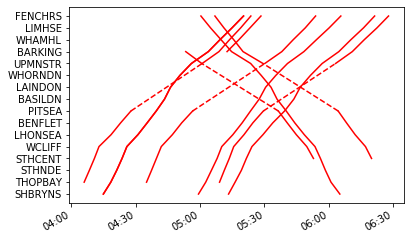

In [100]:
Headcodes=['2B51','2B50','2D01','2R51','2D00','2D03','2B53','2D02','2D05','2B55']
#Headcodes=Uniqueheadcodes
#Colours=['r','b','g','r','g','g','r','g','g','r']
Graphdatacombo=Train_timings(Df,Headcodes[0])
for i in range(1,len(Headcodes)):
    Graphdata=Train_timings(Df,Headcodes[i])
    Graphdatacombo=Graphdatacombo=pd.merge(Graphdatacombo,Graphdata,on='TIPLOC',how='outer')
Graphdatacombo=Graphdatacombo.reset_index()
plt.plot(Graphdatacombo[Headcodes[0]],Graphdatacombo['TIPLOC'],'r')#Colours[0])
for j in range(0,len(Headcodes)):
    graphchunks=null_ranges(Graphdatacombo[Headcodes[j]])
    if len(graphchunks)==1:
        plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[0][0]:graphchunks[0][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[0][0]:graphchunks[0][1]+1],'r')#Colours[j])
    else:
        a=0
        for i in range(0,len(graphchunks)):
            plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[i][0]:graphchunks[i][1]+1],Graphdatacombo['TIPLOC'].iloc[graphchunks[i][0]:graphchunks[i][1]+1],'r')#Colours[j])
        for k in range(0,len(graphchunks)-1):
            plt.plot(Graphdatacombo[Headcodes[j]].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo[Headcodes[j]].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),Graphdatacombo['TIPLOC'].iloc[graphchunks[k][1]:graphchunks[k][1]+1].append(Graphdatacombo['TIPLOC'].iloc[graphchunks[k+1][0]:graphchunks[k+1][0]+1]),'r--')#Colours[j]+'--')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
Graphdatacombo

In [89]:
Graphdatacombo

,TIPLOC,2B51,2B50,2D01,2R51,2D00,2D03,2B53
0,SHBRYNS,2019-10-01 04:15:00,2019-10-01 06:05:05,NaT,NaT,NaT,NaT,2019-10-01 04:59:17
1,THOPBAY,2019-10-01 04:18:28,2019-10-01 06:00:58,2019-10-01 04:06:04,NaT,NaT,2019-10-01 04:35:06,2019-10-01 05:02:39
2,STHNDE,2019-10-01 04:21:13,2019-10-01 05:58:22,2019-10-01 04:08:29,NaT,NaT,2019-10-01 04:37:26,2019-10-01 05:05:19
3,STHCENT,2019-10-01 04:23:42,2019-10-01 05:56:03,2019-10-01 04:10:50,NaT,2019-10-01 05:52:48,2019-10-01 04:39:42,2019-10-01 05:07:57
4,WCLIFF,2019-10-01 04:25:57,2019-10-01 05:53:31,2019-10-01 04:12:58,NaT,2019-10-01 05:49:42,2019-10-01 04:41:58,2019-10-01 05:10:07
5,LHONSEA,2019-10-01 04:31:05,2019-10-01 05:48:33,2019-10-01 04:18:35,NaT,2019-10-01 05:44:50,2019-10-01 04:47:07,2019-10-01 05:15:16
6,BENFLET,2019-10-01 04:35:24,2019-10-01 05:44:06,2019-10-01 04:23:03,NaT,2019-10-01 05:40:35,2019-10-01 04:51:29,2019-10-01 05:19:37
7,PITSEA,2019-10-01 04:39:38,2019-10-01 05:40:07,2019-10-01 04:27:51,NaT,2019-10-01 05:36:26,2019-10-01 04:56:35,2019-10-01 05:23:31
8,BASILDN,2019-10-01 04:43:29,2019-10-01 05:35:50,NaT,NaT,NaT,NaT,2019-10-01 05:27:33
9,LAINDON,2019-10-01 04:46:16,2019-10-01 05:33:03,NaT,NaT,NaT,NaT,2019-10-01 05:30:32


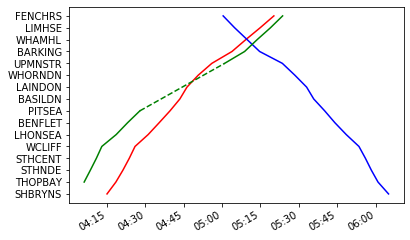

In [24]:
plt.plot(Graphdatacombo['2B51'],Graphdatacombo['TIPLOC'],'r')
plt.plot(Graphdatacombo['2B50'],Graphdatacombo['TIPLOC'],'b')
plt.plot(Graphdatacombo['2D01'].iloc[11:16],Graphdatacombo['TIPLOC'].iloc[11:16],'g')
plt.plot(Graphdatacombo['2D01'].iloc[1:8],Graphdatacombo['TIPLOC'].iloc[1:8],'g')
plt.plot(Graphdatacombo['2D01'].iloc[7:8].append(Graphdatacombo['2D01'].iloc[11:12]),Graphdatacombo['TIPLOC'].iloc[7:8].append(Graphdatacombo['TIPLOC'].iloc[11:12]),'g--')
#plt.xticks(Timearray)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

In [26]:
#SchedTime=[]
#for i in range(0,len(TIPLOCs)):
#    for j in range(0,len(Train)):
#        if Train['TIPLOC'][j]==TIPLOCs[i]:
#            #SchedTime=SchedTime+[str(Train['Sched'][j])]
#            SchedTime=SchedTime+[Train['Sched'][j]]
#            break
#SchedTime

In [27]:
#Graphdata=pd.DataFrame()
#Graphdata['TIPLOC']=TIPLOCs
#Graphdata['Time']=Time
#Graphdata['SchedTime']=SchedTime
#for i in range(0,len(Graphdata)):
#    Graphdata.at[i,'SchedTime']=str(Graphdata['SchedTime'][i])[11:13]+str(Graphdata['SchedTime'][i])[14:16]+str(Graphdata['SchedTime'][i])[17:19]
#    Graphdata.at[i,'Time']=str(Graphdata['Time'][i])[11:13]+str(Graphdata['Time'][i])[14:16]+str(Graphdata['Time'][i])[17:19]
#Graphdata['Time']=pd.to_numeric(Graphdata['Time'])
#Graphdata['SchedTime']=pd.to_numeric(Graphdata['SchedTime'])
#Graphdata

In [28]:
Timearray=[]
Alttimearray=[]
a=pd.to_datetime('20191001040000',format='%Y%m%d%H%M%S')
for i in range(0,9):
    Timearray.append(a)
    a=a+timedelta(minutes=10)
#for i in range(0,len(Timearray)):
#    b=str(Timearray[i])[11:13]+str(Timearray[i])[14:16]+str(Timearray[i])[17:19]
#    Alttimearray.append(b)
Timearray

[Timestamp('2019-10-01 04:00:00'),
 Timestamp('2019-10-01 04:10:00'),
 Timestamp('2019-10-01 04:20:00'),
 Timestamp('2019-10-01 04:30:00'),
 Timestamp('2019-10-01 04:40:00'),
 Timestamp('2019-10-01 04:50:00'),
 Timestamp('2019-10-01 05:00:00'),
 Timestamp('2019-10-01 05:10:00'),
 Timestamp('2019-10-01 05:20:00')]

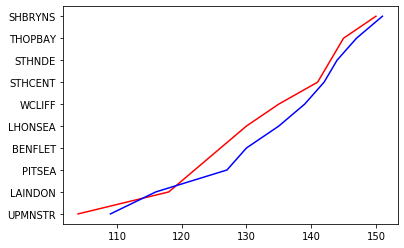

In [29]:
TIPLOCs=['UPMNSTR','LAINDON','PITSEA','BENFLET','LHONSEA','WCLIFF','STHCENT','STHNDE','THOPBAY','SHBRYNS']
#'FENCHRS','LIMHSE','WHAMHL','BARKING','UPMNSTR','LAINDON','BASILDN'
Time=[104,118,122,126,130,135,141,143,145,150]
SchedTime=[109,116,127,130,135,139,142,144,147,151]
plt.plot(Time,TIPLOCs,'r')
plt.plot(SchedTime,TIPLOCs,'b')
plt.show()